<a href="https://colab.research.google.com/github/prieto-daniel/Data-Science-I/blob/main/Entregables/datasets_prieto_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Historico de movimientos encriptado
url = 'https://raw.githubusercontent.com/prieto-daniel/Data-Science-I/refs/heads/main/Datos/TH.csv'
df = pd.read_csv(url, delimiter=';')
print(f'Rows: {len(df)}')

# Como el archivo es una conversion de excel a csv, las fechas las tomo como INT, el origen del excel es 1899-12-30, como dia 0 para la base del calculo.
df['FECHA_DATE'] = pd.to_datetime(df['FECHA'], unit = 'D', origin='1899-12-30')
df['AÑO'] = df['FECHA_DATE'].dt.year

# Excluyo periodos anteriores al año 2024
df = df[df['AÑO'] >= 2024]

df.head()

Rows: 95767


,ID,AGENTE,CANAL,SEGMENTO,ESTADO,ZONA,PROVINCIA,PERIODO,BP,QR,PEICI,PEICO,IOB,IIB,DOB,DIB,FECHA,FECHA_DATE,AÑO
0,QjAyMDM=,Q09SUkVPIExBIFBMQVRBIC0gMw==,Agte Corporativo,-,ACTIVO,AMBA,BUENOS AIRES,202405,0,0,0,0,0,1,0,0,45413,2024-05-01,2024
1,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202403,0,0,0,0,10,4,0,0,45352,2024-03-01,2024
2,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202404,0,0,0,0,6,2,0,0,45383,2024-04-01,2024
3,QjA1NDA=,Q09SUkVPIENMQVJPTUVDTw==,Agte Corporativo,-,ACTIVO,INTERIOR,BUENOS AIRES,202405,0,0,0,0,6,1,0,0,45413,2024-05-01,2024
4,QjA1NDk=,Q09SUkVPIENBUkhVRQ==,Agte Corporativo,3.B,ACTIVO,INTERIOR,BUENOS AIRES,202403,0,0,0,0,13,9,0,0,45352,2024-03-01,2024


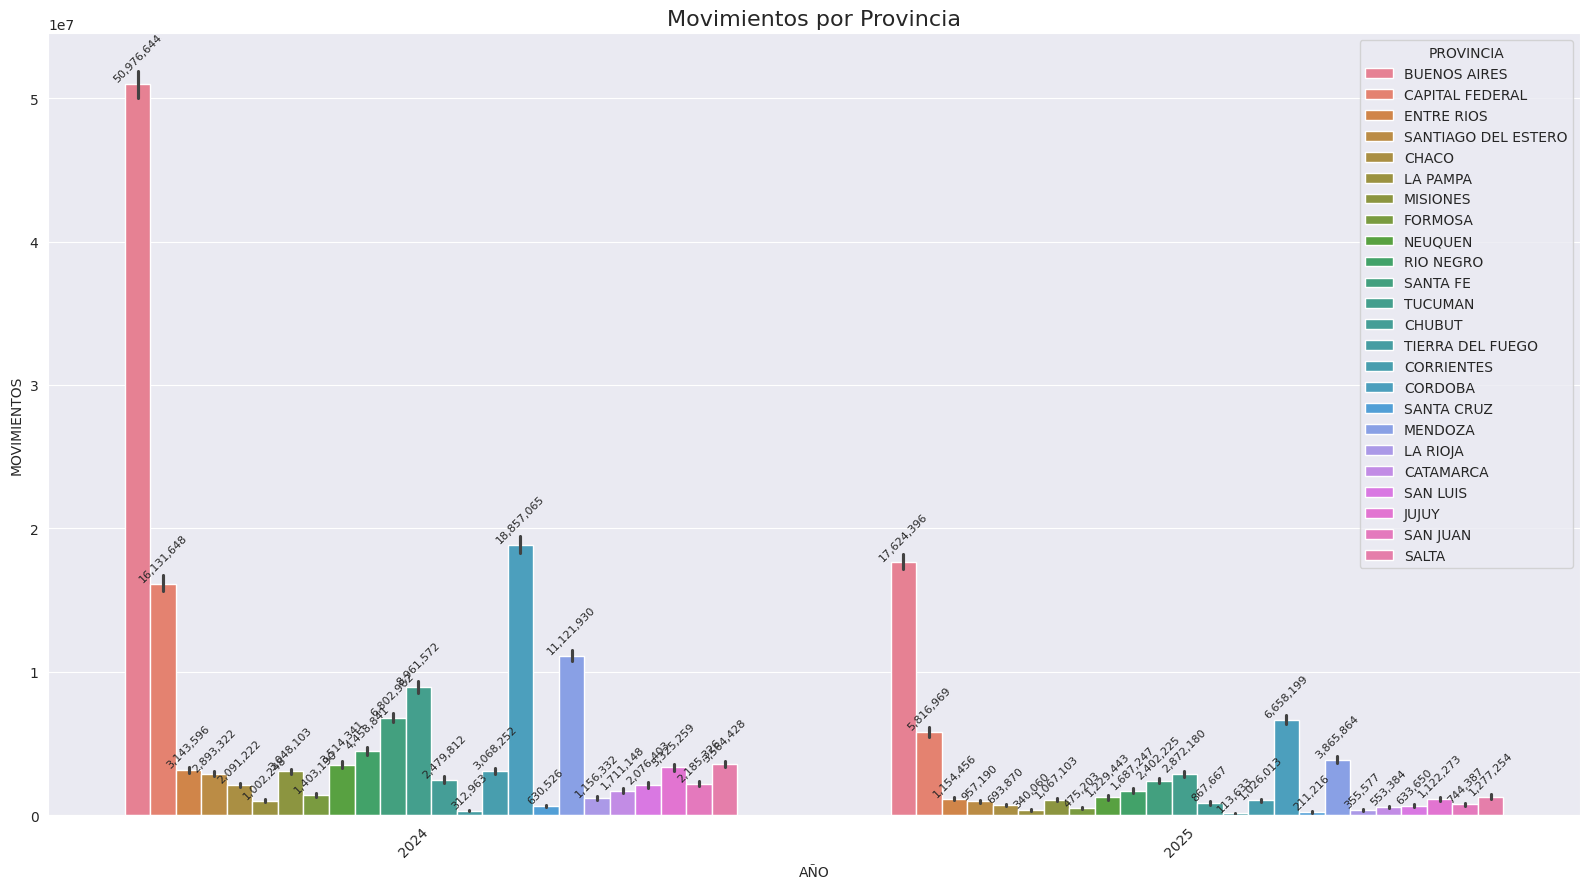

In [ ]:
# Visualizar los datos
plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(data = df, x = 'AÑO', y = 'BP', hue = 'PROVINCIA', estimator ='sum')
plt.title('Movimientos por Provincia', fontsize = 16)
plt.xlabel('AÑO', fontsize = 10)
plt.ylabel('MOVIMIENTOS', fontsize = 10)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', fontsize=8, rotation=45)

plt.show()